<a href="https://colab.research.google.com/github/MisterGusMan/Deep_Learning_IGTI/blob/main/M%C3%B3dulo1/Trabalho_Pr%C3%A1tico_do_M%C3%B3dulo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np #importa biblioteca para manipulação de matrizes
from matplotlib import pyplot as plt #importa bilbioteca para criação de gráficos
import tensorflow as tf
from tensorflow import keras

#início das importações de classes do Keras (modelos de Deep Learning)
from keras.datasets import fashion_mnist          #importa dataset mnist
from keras.models import Sequential       #importa um modelo sequencial
from keras.layers import Dense            #importa camadas totalmente conectadas
from keras.layers import Dropout          #importa a estrutura de dropout
from keras.utils import np_utils          #importa biblioteca de utilidades do Keras

In [24]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data() #importa o dataset Mnist da biblioteca do Keras

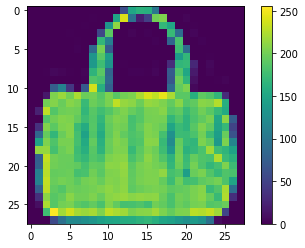

In [25]:
plt.figure()
plt.imshow(X_train[4000])
plt.colorbar()
plt.grid(False)

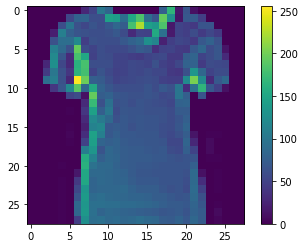

In [26]:
plt.figure()
plt.imshow(X_test[4000])
plt.colorbar()
plt.grid(False)

In [27]:
X_train.shape[1] * X_train.shape[2]

784

In [28]:
from tensorflow.image import resize 
X_train_1 = np.expand_dims(X_train, axis=-1) 
X_train_1 = np.repeat(X_train_1, 3, axis=-1) 
X_train_resize = resize(X_train_1, [32,32])  

In [8]:
X_train_resize.shape[1] * X_train_resize.shape[2]

1024

In [30]:
from keras.applications.vgg16 import VGG16
model = VGG16(input_shape=(32,32,3), weights=None, classes = 10)
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [32]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
history = model.fit(X_train_resize, y_train_h, validation_data=(X_test2, y_test_h), epochs=10, verbose=1, batch_size = 128) #executa o treinamento

#imprime acurácia do modelo no conjunto de teste
scores = model.evaluate(X_test2, y_test_h, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/10
  2/469 [..............................] - ETA: 1:41:56 - loss: 17.8285 - accuracy: 0.1152

KeyboardInterrupt: ignored

In [33]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data() #importa o dataset Mnist da biblioteca do Keras

In [34]:
num_pixels = X_train.shape[1] * X_train.shape[2]  #calcula o total de pixels da imagem
print(num_pixels)

#tranforma os valores dos pixels para float32
X_train2 = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test2 = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

#normalizando os valores dos pixels entre 0 e 1
X_train2 = X_train2 / 255
X_test2 = X_test2 / 255

784


In [35]:
#trasnforma os y em one-hot vector
y_train_h = np_utils.to_categorical(y_train)
y_test_h = np_utils.to_categorical(y_test)

#obtém o número de classes do problema
num_classes = y_test_h.shape[1]

print(num_classes)
print(y_train_h[1001])

10
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [37]:
model = keras.Sequential([
                          keras.layers.Dense(num_pixels, input_dim = num_pixels, kernel_initializer='normal', activation='relu'),
                          keras.layers.Dense(1024,  kernel_initializer='normal', activation='relu'),
                          keras.layers.Dense(2048,  kernel_initializer='normal', activation='relu'),
                          keras.layers.Dense(2048,  kernel_initializer='normal', activation='relu'),
                          keras.layers.Dense(num_classes, kernel_initializer='normal', activation='softmax')
])

In [38]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_22 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dense_23 (Dense)             (None, 2048)              2099200   
_________________________________________________________________
dense_24 (Dense)             (None, 2048)              4196352   
_________________________________________________________________
dense_25 (Dense)             (None, 10)                20490     
Total params: 7,735,322
Trainable params: 7,735,322
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  #compila o modelo criado
history = model.fit(X_train2, y_train_h, validation_data=(X_test2, y_test_h), epochs=10, verbose=1, batch_size = 100) #executa o treinamento

#imprime acurácia do modelo no conjunto de teste
scores = model.evaluate(X_test2, y_test_h, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/10
435/600 [====================>.........] - ETA: 26s - loss: 0.5610 - accuracy: 0.8152

KeyboardInterrupt: ignored